In [ ]:
pip install pymc

In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [2]:
# Data Preparation
df = pd.read_csv('Eartquakes-1990-2023.csv')


df['state'] = df['state'].astype('category')
state_idx = df['state'].cat.codes.values
states = df['state'].cat.categories
n_states = len(states)

In [4]:
with pm.Model() as model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10, shape=n_states)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Expected value of outcome
    mu = alpha[state_idx] + beta * df['magnitudo']

    # Likelihood (sampling distribution) of observationsw
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=1, observed=df['magnitudo'])

    # Inference
    trace = pm.sample(500, tune=500, chains=1, return_inferencedata=True)

# Plotting the results
pm.plot_trace(trace)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta]


ValueError: Not enough samples to build a trace.

In [5]:
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [7]:
df.dtypes

time               int64
place             object
status            object
tsunami            int64
significance       int64
data_type         object
magnitudo        float64
state           category
longitude        float64
latitude         float64
depth            float64
date              object
dtype: object

In [8]:
df

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00


In [11]:
# Create categoties for the magnitude column based on the Richter scale.
def categorize_earthquake(mag):
    if mag < 2.0:
        return 'Micro'
    elif 2.0 <= mag <= 3.9:
        return 'Minor'
    elif 4.0 <= mag <= 4.9:
        return 'Light'
    elif 5.0 <= mag <= 5.9:
        return 'Moderate'
    elif 6.0 <= mag <= 6.9:
        return 'Strong'
    elif 7.0 <= mag <= 7.9:
        return 'Major'
    else:
        return 'Great'

df['magnitude_category'] = df['magnitudo'].apply(categorize_earthquake)
df

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,magnitude_category
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00,Minor
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00,Micro
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00,Micro
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00,Micro
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00,Light
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00,Micro
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00,Minor
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00,Micro


<Axes: >

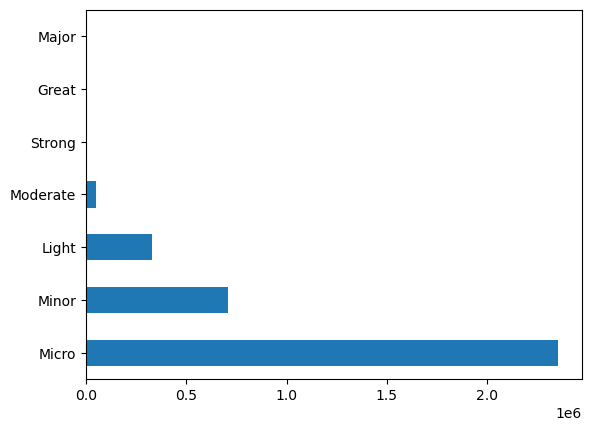

In [21]:
df['magnitude_category'].value_counts().plot(kind='barh')

<Axes: >

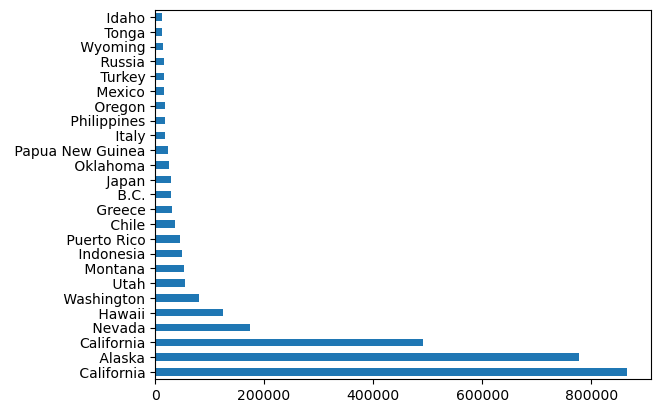

In [25]:
df['state'].value_counts()[:25].plot(kind='barh')

In [15]:
df[df['magnitude_category'] == 'Major']

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,magnitude_category
10713,636466587960,south of the Fiji Islands,reviewed,0,889,earthquake,7.6,south of the Fiji Islands,175.1630,-22.1220,33.200,1990-03-03 12:16:27.960000+00:00,Major
11325,636655092570,"69 km SSW of Port-Vila, Vanuatu",reviewed,0,776,earthquake,7.1,Vanuatu,168.0630,-18.3180,20.700,1990-03-05 16:38:12.570000+00:00,Major
14545,638371375600,"7 km SSE of Puntarenas, Costa Rica",reviewed,0,820,earthquake,7.3,Costa Rica,-84.8080,9.9190,22.200,1990-03-25 13:22:55.600000+00:00,Major
16031,639349955550,"198 km E of Saipan, Northern Mariana Islands",reviewed,0,889,earthquake,7.6,Northern Mariana Islands,147.5960,15.1250,11.400,1990-04-05 21:12:35.550000+00:00,Major
18373,640445959010,"75 km NNW of Gorontalo, Indonesia",reviewed,0,936,earthquake,7.8,Indonesia,122.8570,1.1860,25.700,1990-04-18 13:39:19.010000+00:00,Major
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415834,1683734520334,"82 km WNW of Hihifo, Tonga",reviewed,1,910,earthquake,7.6,Tonga,-174.4925,-15.6278,210.000,2023-05-10 16:02:00.334000+00:00,Major
3418967,1684465023172,southeast of the Loyalty Islands,reviewed,1,928,earthquake,7.7,southeast of the Loyalty Islands,170.7423,-23.2063,18.053,2023-05-19 02:57:03.172000+00:00,Major
3419455,1684547459158,southeast of the Loyalty Islands,reviewed,1,777,earthquake,7.1,southeast of the Loyalty Islands,170.5603,-23.0421,27.309,2023-05-20 01:50:59.158000+00:00,Major
3429841,1686852388572,"274 km SW of Houma, Tonga",reviewed,1,805,earthquake,7.2,Tonga,-177.1067,-22.9936,179.000,2023-06-15 18:06:28.572000+00:00,Major


In [33]:
df.groupby(by =['state']).count()

,time,place,status,tsunami,significance,data_type,magnitudo,longitude,latitude,depth,date,magnitude_category
state,,,,,,,,,,,,
AK,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921,1921
AR,8,8,8,8,8,8,8,8,8,8,8,8
AZ,34,34,34,34,34,34,34,34,34,34,34,34
Afghanistan,5477,5477,5477,5477,5477,5477,5477,5477,5477,5477,5477,5477
Alabama,323,323,323,323,323,323,323,323,323,323,323,323
...,...,...,...,...,...,...,...,...,...,...,...,...
western Mediterranean Sea,16,16,16,16,16,16,16,16,16,16,16,16
western Texas,507,507,507,507,507,507,507,507,507,507,507,507
western Uzbekistan,3,3,3,3,3,3,3,3,3,3,3,3
